<a href="https://colab.research.google.com/github/jerry-simon/Data_Science_And_Machine_Learning/blob/main/Jamboree_Business_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jamboree Education - Problem statement
Jamboree is an education platform that has helped thousands of students to prepare for competitive exams such as GMAT, GRE or SAT. They have a unique problem solving methods to ensure maximum scores with minimum effort. A recent feature update in their platform helps students to visit their website and check their probability of getting into the IVY league college.

As a Data Analyst/ Scientist I have to help on the following things:-
> What factors are important in graduate admissions?

> How these factors are interrelated among themselves?

> It will also help predict one's chances of admission given the rest of the variables.

In [1]:
#Importing essential library files.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Summary of the Jamboree dataset

In [2]:
#Reading the dataset and displaying the top 10 for a basic understanding.
df = pd.read_csv("Jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
#Checking the shape of the data
df.shape

(500, 9)

The Jamboree dataset consists of **500 records** and **9 variables** in it.

In [4]:
#To display some basic information about the Jamboree dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


The dataset comprises 500 records, indexed from 0 to 499, and includes a total of 9 columns. Among these, 5 columns—**Serial No.**, **GRE Score**, **TOEFL Score**, **University Rating**, and **Research**—are of integer data type. The remaining 4 columns—**SOP**, **LOR**, **CGPA**, and **Chance of Admit**—are of floating-point data type. Notably, the dataset is complete and contains no null values, making it well-structured for analysis. Last but not least, the total memory usage of the dataset is 35.3 KB.

In [5]:
#Converting research column, an integer column into a categorical column
df['Research'] = df['Research'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Serial No.         500 non-null    int64   
 1   GRE Score          500 non-null    int64   
 2   TOEFL Score        500 non-null    int64   
 3   University Rating  500 non-null    int64   
 4   SOP                500 non-null    float64 
 5   LOR                500 non-null    float64 
 6   CGPA               500 non-null    float64 
 7   Research           500 non-null    category
 8   Chance of Admit    500 non-null    float64 
dtypes: category(1), float64(4), int64(4)
memory usage: 32.0 KB


The integer variable **Research** is now converted into a categorical column.

In [6]:
#Checking for missing values or missing value detection
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


We have already confirmed that our Jamboree dataset is free from missing values with the help of .info(). The isnull() re-affirms the same.

In [7]:
#Statistical summary of jamboree dataset excluding the categorical values
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,0.97000


The above describe() shows only the summary stats of the numerical variable while excluding the summary stats of categorical variables. In this section, I'm only highlighting the necessary details,

> **Serial No.** - This is a unique id column which does not contain any relevant information about the dataset other than identifying each records uniquely.

> **GRE Score** - The average GRE score is 316.472 with a std. deviation of 11.29. The minimum GRE score in the given dataset is 290 and the maximum GRE score is 340.

> **TOFEL Score** - The average TOFEL score is 107.192 with a std. deviation of 6.08. The minimum TOFEL score in the given dataset is 92 and the maximum TOFEL score is 120.

> **University Rating** - It is an ordinal column with only 5 values.

> **SOP & LOR** - Both of these are ordinal columns with 9 fixed values in it.

> **CGPA** - The average CGPA score is 8.57 with a std. deviation of 0.60. The minimum CGPA score in the given dataset is 6.8 and the maximum CGPA score is 9.92.

> **Chance of Admit** - The average score of this column is 0.72 with a std. deviation of 0.14. The minimum value in the given dataset is 0.34 and the maximum CGPA score is 0.97.

In [8]:
#Displaying the statistical summary of Jamboree dataset's categorical column.
df.describe(include='category')

,Research
count,500
unique,2
top,1
freq,280


The **Research** column contains only 2 categorical values and it says that the majority of the dataset contains the value 1 or they have done the research. It is also been found that the number of times this value is repeated in the given dataset is 280.

### Univariate Analysis

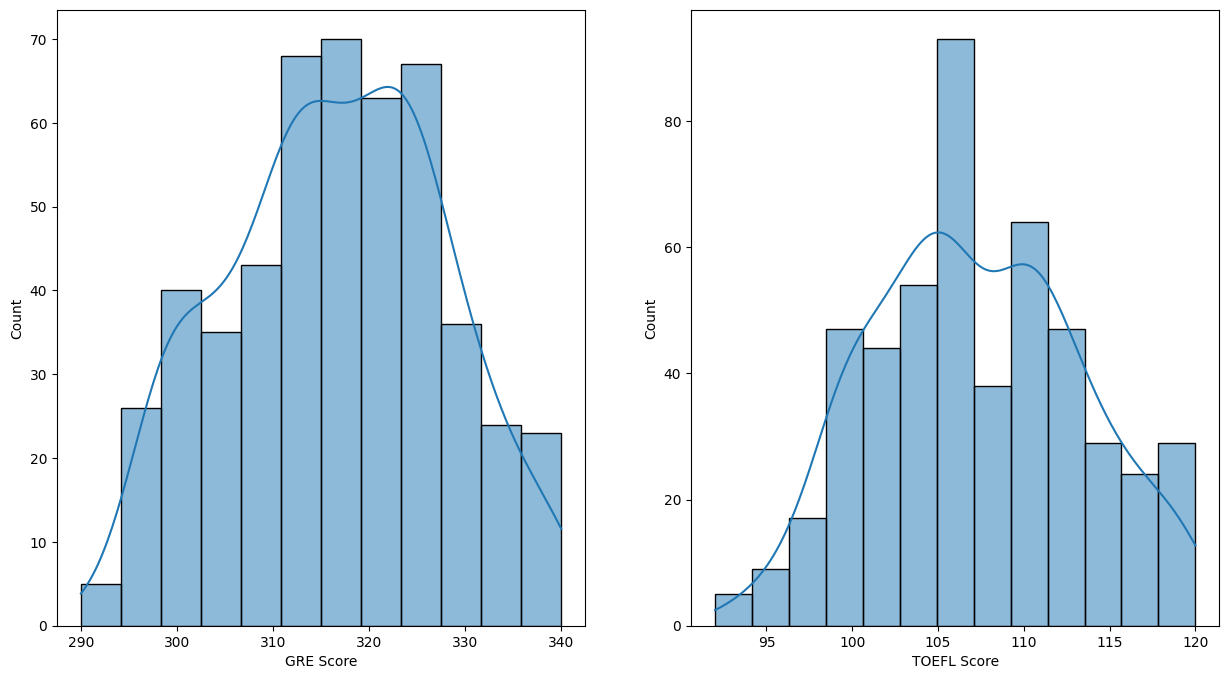

In [9]:
#A histogram plot for GRE Score and TOFEL Score
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.histplot(data=df,x='GRE Score',kde=True, ax=ax[0])
sns.histplot(data=df,x='TOEFL Score', kde=True, ax=ax[1])
plt.show()

The GRE and TOEFL scores follow a normal distribution, with an interesting observation: GRE scores range between 290 and 340, while TOEFL scores fall between 95 and 120. This suggests that the GRE scores and TOEFL scores are measured in different scalee, and therefore there's a need for standardisation.

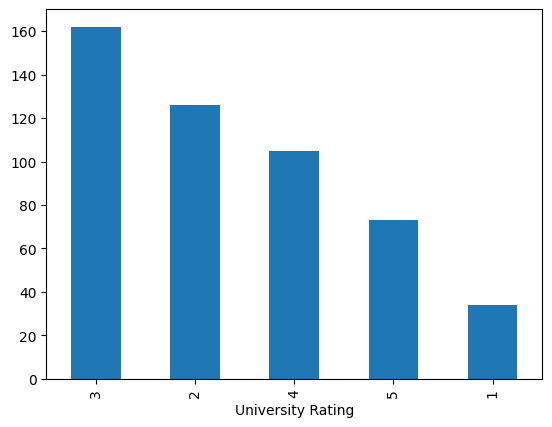

In [10]:
#A bargraph for university ratings
df['University Rating'].value_counts().plot(kind='bar')
plt.show()

The majority of universities are rated 3, with ratings of 2 and 4 following in frequency. Notably, only a small number of universities have a rating of 1.

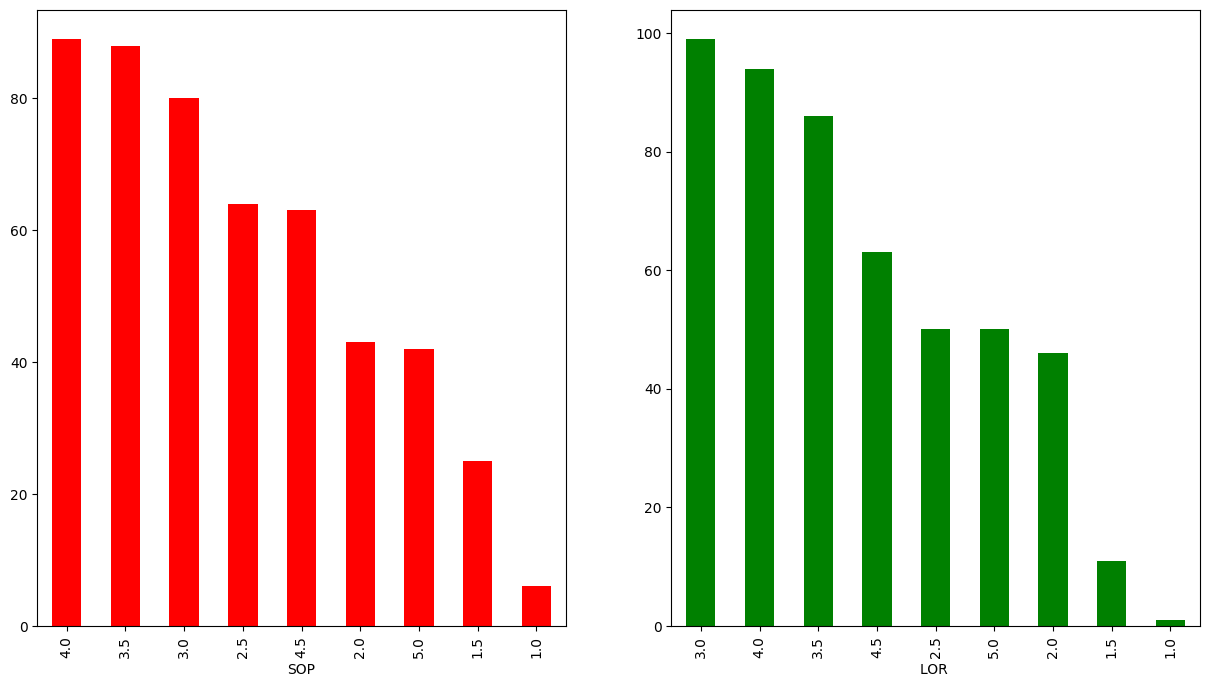

In [11]:
#A bar plot for SOP and LOR rating
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
df['SOP'].value_counts().plot(kind='bar',ax=ax[0],color='red')
df['LOR '].value_counts().plot(kind='bar',ax=ax[1],color='green')
plt.show()

**SOP Ratings** - Most of the SOP's have scored a rating of 4 and only a few SOP's have scored a rating of 1.5 followed by 1.0.

**LOR Ratings** - The LOR with rating 3 has shown a significant presence in the Jamboree dataset while a few LOR has scored a rating of 1.5 which is followed by 1.0.

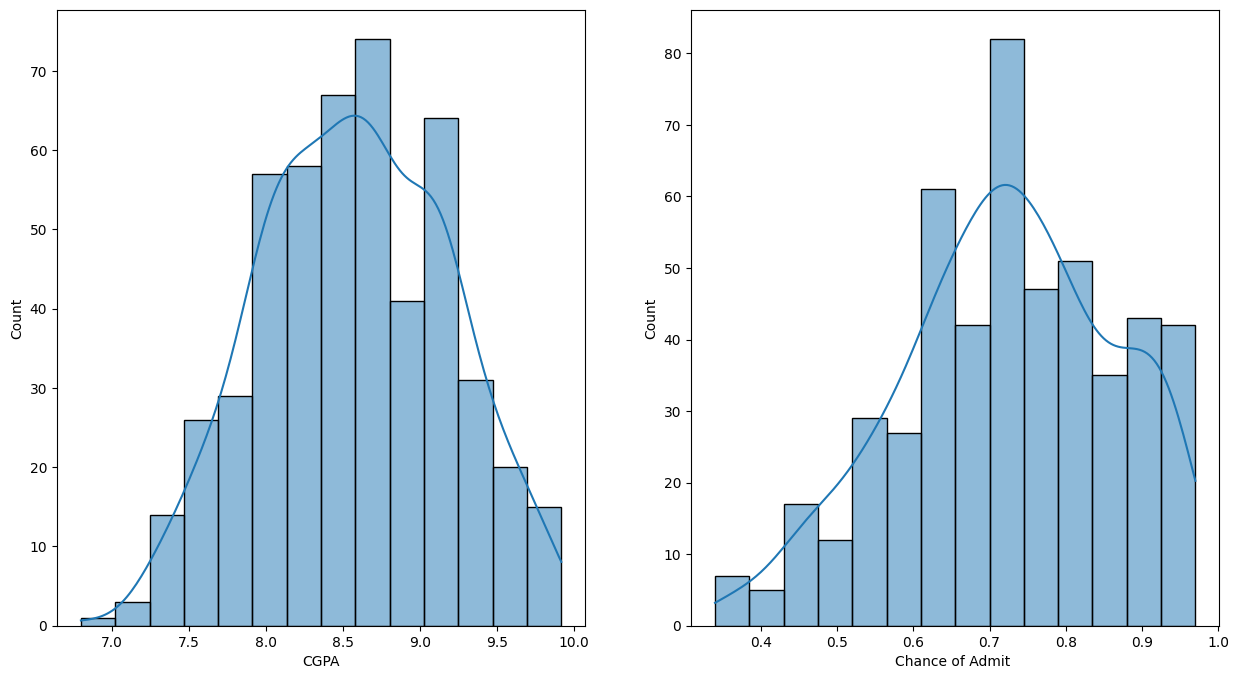

In [12]:
#A histogram plot for CGPA Score and chance of admit Score
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.histplot(data=df,x='CGPA',kde=True, ax=ax[0])
sns.histplot(data=df,x='Chance of Admit ', kde=True, ax=ax[1])
plt.show()

**CGPA Score** - The graph on the left side shows the histogram plot for the CGPA score and it is shown that most of the students CGPA score lies in between 6.0 and 9.8.

**Chance of Admit** - The histogram on the right side shows the chance of admit with a probabilistic value that lies in between 0 and 1. The graph is almost a left skewed plot as well.

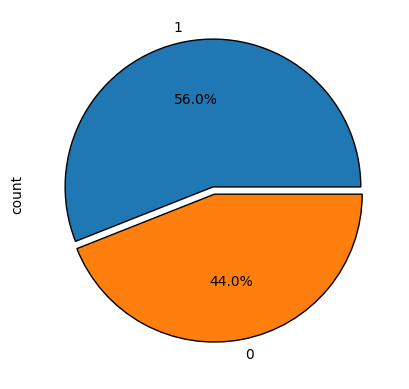

In [13]:
#A pie plot depicts the value counts of the research column.
df['Research'].value_counts().plot(kind='pie',autopct='%1.1f%%',wedgeprops={'edgecolor': 'black', 'linewidth': 1},explode=[0.05,0])
plt.show()

The pie plot shows that the majority of the students have acquired research experience (approximately 56%) while the pupil's who have not done any research falls under 44 percent.

### Bivariate Analysis

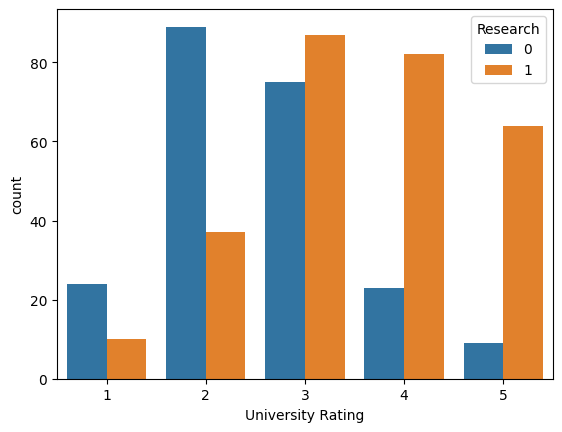

In [14]:
#A Countplot showing how research has impacted the university ratings
sns.countplot(data=df,x='University Rating',hue='Research')
plt.show()

Universities with ratings of 1 and 2 tend to attract more candidates without any research experience. In contrast, universities rated 3, 4, and 5 have received applications predominantly from candidates with prior research experience. Interestingly, university rating 3 has received a higher number of candidates with research experience compared to university rating 5.

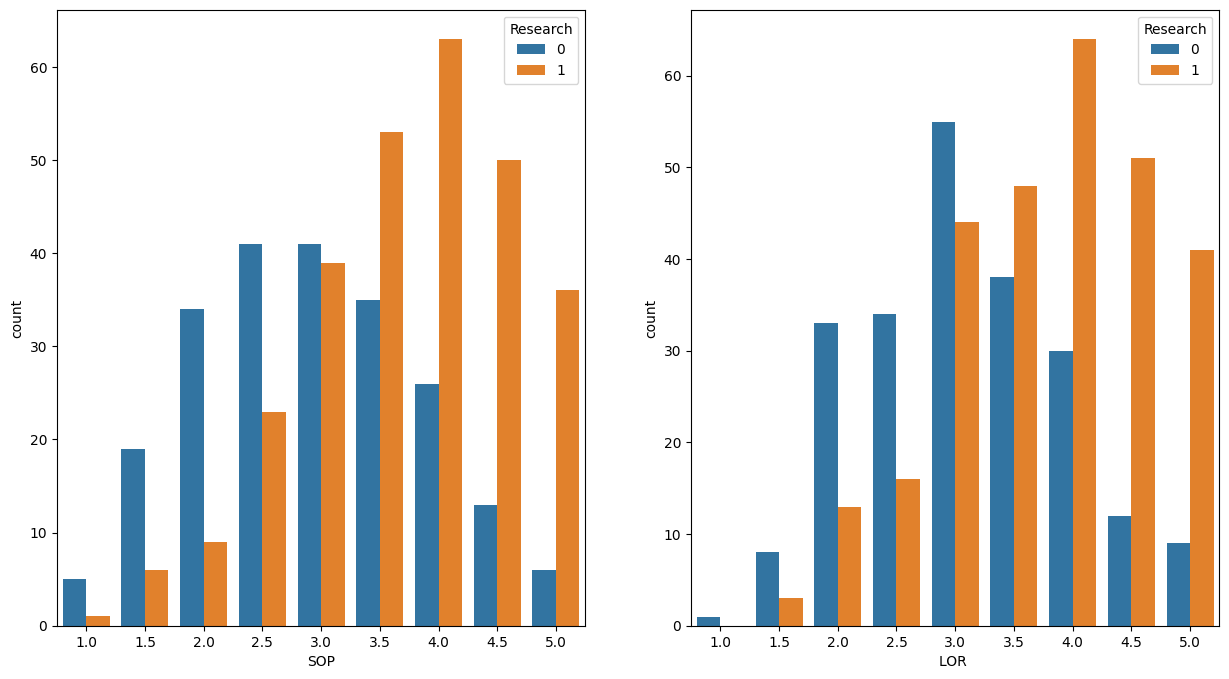

In [15]:
#A Countplot showing how research has impacted the SOP and LOR ratings
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.countplot(data=df,x='SOP',hue='Research',ax=ax[0])
sns.countplot(data=df,x='LOR ',hue='Research',ax=ax[1])
plt.show()

**SOP** - The graph on the left illustrates the impact of research on SOP ratings. It reveals that SOP ratings of 3 or below have a higher proportion of applicants without research experience, whereas ratings of 3.5 and above show a significant number of applicants with research experience.

**LOR** - The graph on the right illustrates the impact of research on LOR ratings. It reveals that LOR ratings of 3 or below have a higher proportion of applicants without research experience, whereas ratings of 3.5 and above show a significant number of applicants with research experience.

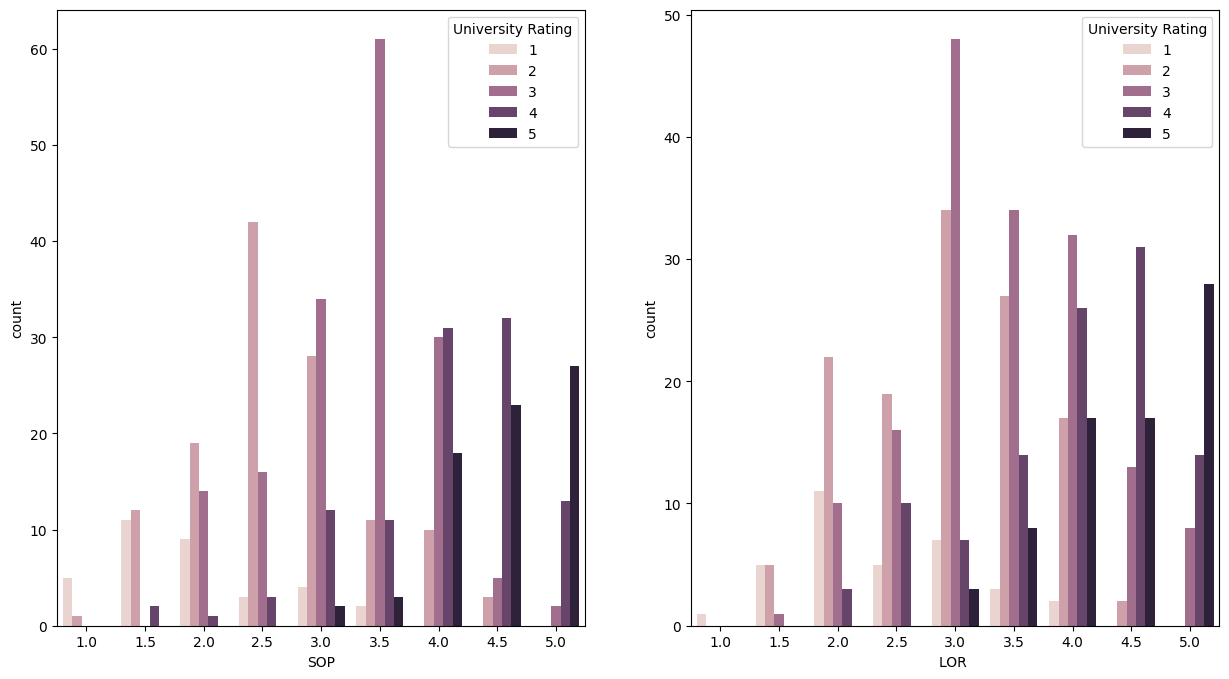

In [16]:
#A Countplot showing how university ratings has impacted the SOP and LOR ratings
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.countplot(data=df,x='SOP',hue='University Rating',ax=ax[0])
sns.countplot(data=df,x='LOR ',hue='University Rating',ax=ax[1])
plt.show()

**SOP** - The graph on the left illustrates the relationship between SOP ratings and university ratings. It demonstrates that top universities or those with higher ratings tend to receive candidates with higher SOP ratings, and the trend is reversed for universities with lower ratings.

**LOR** - The graph on the right illustrates the relationship between LOR ratings and university ratings. It demonstrates that top universities or those with higher ratings tend to receive candidates with higher LOR ratings, and the trend is reversed for universities with lower ratings.

### Data Preprocessing

In [17]:
#To check the presence of duplcate values
df.duplicated().sum()

np.int64(0)

The dataset does not contains any duplcate entries.

In [18]:
#To check the presence of null values
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


The dataset does not suffer from null any values.

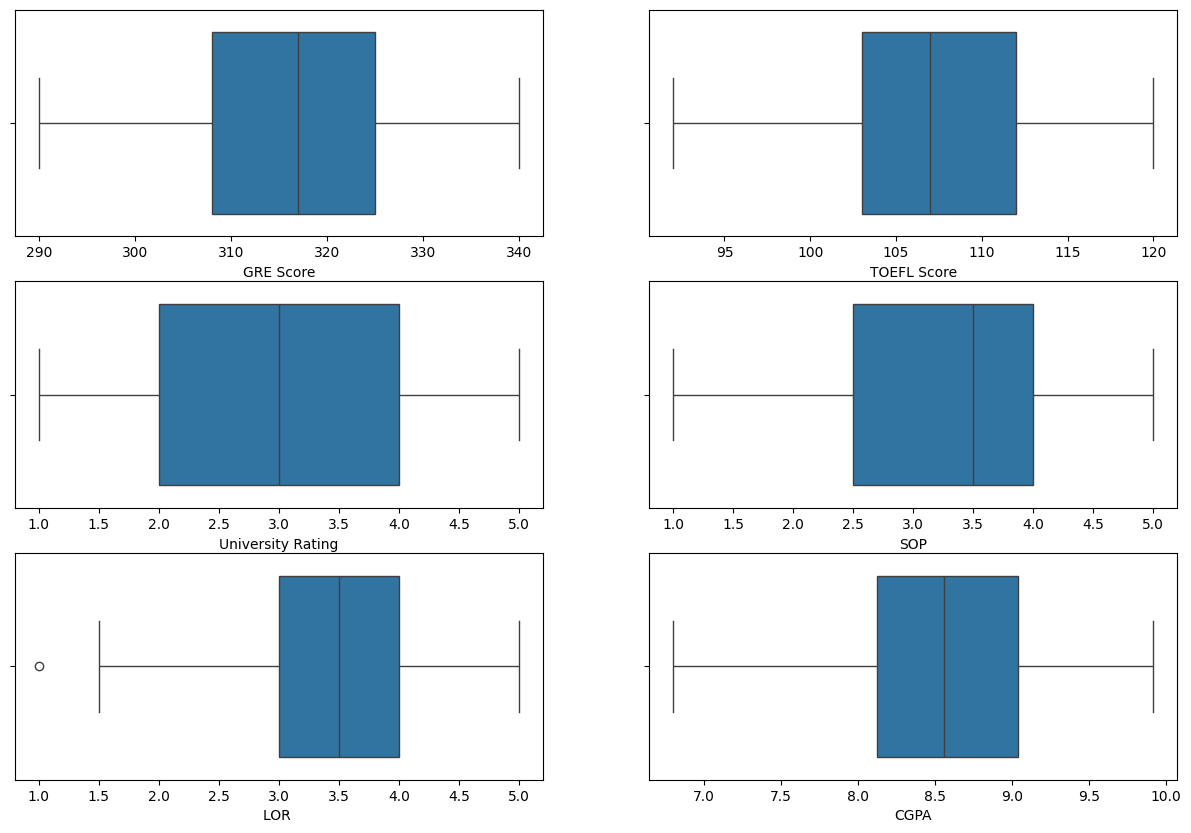

In [19]:
#To check the presence of outlier values
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(15,10))
sns.boxplot(data=df,x='GRE Score',ax=ax[0,0])
sns.boxplot(data=df,x='TOEFL Score',ax=ax[0,1])
sns.boxplot(data=df,x='University Rating',ax=ax[1,0])
sns.boxplot(data=df,x='SOP',ax=ax[1,1])
sns.boxplot(data=df,x='LOR ',ax=ax[2,0])
sns.boxplot(data=df,x='CGPA',ax=ax[2,1])
plt.show()

The dataset is almost free from outliers.

In [20]:
#Feature Engineering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,-1.728590,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,-1.721662,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-1.714734,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,-1.707806,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-1.700877,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797


The dataset contains variables measured on different scales, such as GRE and TOEFL scores, which are continuous, and University Rating, SOP, LOR, and Research, which are categorical. These factors can significantly influence the target variable.

In [21]:
#Data Preprocessing
from sklearn.model_selection import train_test_split
y = df['Chance of Admit ']
X = df.drop('Chance of Admit ', axis=1)
X = X.drop('Serial No.', axis=1)
y.shape, X.shape

((500,), (500, 7))

In the above code, the target variable is stored in y, while the features or independent variables are stored in X. After defining these variables, the target variable is dropped from the features dataset to avoid redundancy. Additionally, the serial number column is also removed, as it does not contribute to building the machine learning model.

In [22]:
#train - test split (80% training data and 20% testing data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

The target variable and feature set are split into four subsets, with 80% of the data allocated to the training set and 20% to the testing set. Finally, the shapes of each subset are displayed in the output above.

### Linear Regression Model

In [23]:
#Importing linear regression model from sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [24]:
#Fitting the linear regression model on the training dataset
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
#Displaying the coefficients of linear regression model
model.coef_

array([0.14663037, 0.13676748, 0.04965566, 0.02109985, 0.09459574,
       0.50009953, 0.07002187])

Given that there are seven variables, the model produces seven corresponding coefficients.

In [26]:
#Displaying the slope
model.intercept_

np.float64(0.008094500786335137)

The above value represents the slope of the given model.

In [27]:
import pickle
file_path = "jamboree.sav"
with open(file_path, 'wb') as file:
    # Use pickle.dump() to write the object to the file
    pickle.dump(model, file)

In [28]:
#Once we fit our model, we use predict function to understand if our model has learned properly from the training data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [29]:
#Importing MSE and R2 score functions from sklearn.metrics library
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
#Calculation of MSE for training and testing
mse_lr_train = mean_squared_error(y_train, y_train_pred)
mse_lr_test = mean_squared_error(y_test, y_test_pred)
print("training MSE : ",mse_lr_train)
print("testing MSE  : ",mse_lr_test)

training MSE :  0.17973912139741452
testing MSE  :  0.17399217834898525


MSE (Mean Squared Error) measures the average squared difference between the actual and predicted values in linear regression. It represents how well the model fits the data, with smaller values indicating better performance.

Interpreting the MSE Values: Training MSE: 0.1797 & Testing MSE: 0.1739

Inference:

> The similar values for training and testing MSE indicate that the model generalizes well and is not overfitting or underfitting.

> Both values being relatively low suggests the model is making accurate predictions on both datasets.

In [31]:
#Calculation of RMSE for training and testing
rmse_lr_train = np.sqrt(mse_lr_train)
rmse_lr_test = np.sqrt(mse_lr_test)
print("training RMSE : ",rmse_lr_train)
print("testing RMSE  : ",rmse_lr_test)

training RMSE :  0.42395650885133784
testing RMSE  :  0.4171236967003736


RMSE (Root Mean Squared Error) is the square root of MSE and measures the average magnitude of prediction errors. It reflects the model's ability to predict values close to actual ones in the same units as the target variable. Lower RMSE indicates better model performance.

Interpreting the RMSE Values : Training RMSE: 0.424 & Testing RMSE: 0.417

Inference:
> The similar values for training and testing RMSE indicate the model generalizes well, showing no significant overfitting or underfitting.

> The small difference suggests the model performs consistently on unseen data, indicating reliability.

In [32]:
#Calculation of R2 score for training and testing
r2_lr_train = r2_score(y_train, y_train_pred)
r2_lr_test = r2_score(y_test, y_test_pred)
print("training R2 Score : ",r2_lr_train)
print("testing R2 Score  : ",r2_lr_test)

training R2 Score :  0.8215099192361264
testing R2 Score  :  0.8208741703103732


The R2 Score (coefficient of determination) score measures how well the independent variables explain the variance of the dependent variable. It ranges from 0 to 1, where a value closer to 1 indicates a better fit.

Interpreting the R2 Scores : Training R2: 0.821 & Testing R2: 0.820

Inference:
> Both training and testing R2 score are high and very close, suggesting the model fits the data well and generalizes effectively to unseen data.

> The slight difference indicates minimal overfitting, which is desirable in predictive modeling.

In [33]:
#Calculation of Adj. R2 score for training and testing
n_train, p = X_train.shape
n_test = X_test.shape[0]

adj_lr_r2_train = 1 - ((1 - r2_lr_train) * (n_train - 1) / (n_train - p - 1))
adj_lr_r2_test = 1 - ((1 - r2_lr_test) * (n_test - 1) / (n_test - p - 1))
print("training Adj. R2 Score : ",adj_lr_r2_train)
print("testing Adj. R2 Score  : ",adj_lr_r2_test)

training Adj. R2 Score :  0.8183225963653429
testing Adj. R2 Score  :  0.8072450310948581


Adjusted R2 accounts for the number of predictors in the model, providing a more accurate evaluation of model performance by penalizing the inclusion of irrelevant features. It adjusts the R2 value based on the number of independent variables, ensuring that adding more variables does not artificially inflate the score.

Interpreting the Adj. R2 Scores : Training Adj. R2: 0.8183 & Testing Adj. R2: 0.8072

Inference:
> Both values are high, suggesting a good model fit and the small gap indicates the model generalizes well to test data.

> Adjusted R2 is slightly lower than 𝑅2 , reflecting appropriate penalization for model complexity.

### Testing the assumptions of the linear regression model

#### A. Multicolinearity check by VIF score

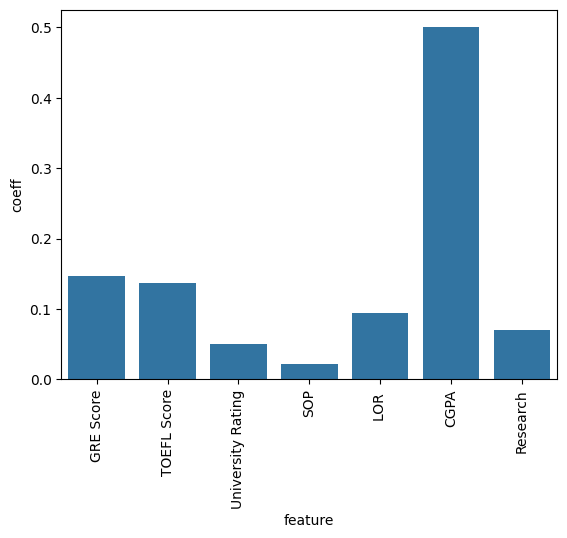

In [34]:
#To check the importance of each feature
imp = pd.DataFrame(list(zip(X_test.columns,np.abs(model.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)
plt.show()

Features with small coefficients like SOP might indicate excessive correlation with others, suggesting redundancy that should be further investigated using VIF. On the other hand, features like CGPA, GRE, TOEFL has higher coefficients that indicates less correlation.

In [35]:
#Predicting GRE with other feature values
import statsmodels.api as sm
vif = pd.DataFrame()
vif["Features"] = X_train.columns
cols2 = vif["Features"][1:].values
target = vif["Features"][0] #GRE score
X2 = pd.DataFrame(X_train, columns=X_train.columns)[cols2]
X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
y2 = pd.DataFrame(X_train)[target]

sm_model = sm.OLS(y2, X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:              GRE Score   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     254.2
Date:                Mon, 01 Dec 2025   Prob (F-statistic):          6.50e-132
Time:                        04:12:45   Log-Likelihood:                -255.06
No. Observations:                 400   AIC:                             524.1
Df Residuals:                     393   BIC:                             552.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0223      0.02


Predicting GRE scores involves features such as TOEFL, CGPA, SOP, University Rating, LOR, and Research, yielding a ( R \) value of 0.79. While t  ( R \) score indicates moderate predictive accuracy, it also suggests relatively low multicollinearity among the features. This is supported by the expectation of low VIF values, reducing concerns about redundancy or strong interdependence between the GRE score and other variables.

In [36]:
#Calculating the VIF score
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = pd.DataFrame(X2_sm, columns=X2_sm.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.05
1,TOEFL Score,3.18
3,SOP,2.90
2,University Rating,2.78
4,LOR,2.08
6,Research,1.38
0,const,1.01


All the VIF scores are less than 5 which suggests that there's no need to drop any variables in the gives data set.

In [37]:
#Predicting TOEFL score with other feature values
vif = pd.DataFrame()
vif["Features"] = X_train.columns
cols1 = np.asarray(vif["Features"][0]).reshape(1)
cols2 = vif["Features"][2:].values
target = vif["Features"][1] #TOEFL Score
cols2 = np.concatenate((cols1,cols2))
X2 = pd.DataFrame(X_train, columns=X_train.columns)[cols2]
X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
y2 = pd.DataFrame(X_train)[target]

sm_model = sm.OLS(y2, X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:            TOEFL Score   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     213.4
Date:                Mon, 01 Dec 2025   Prob (F-statistic):          2.73e-120
Time:                        04:12:45   Log-Likelihood:                -285.53
No. Observations:                 400   AIC:                             585.1
Df Residuals:                     393   BIC:                             613.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0279      0.02

Predicting TOEFL scores involves features such as GRE, CGPA, SOP, University Rating, LOR, and Research, yielding a (R^2) value of 0.76. While the (R^2) score indicates moderate predictive accuracy, it also suggests relatively low multicollinearity among the features. This is supported by the expectation of low VIF values, reducing concerns about redundancy or strong interdependence between the TOEFL score and other variables.

In [38]:
#Calculating the VIF scores
vif = pd.DataFrame()
X_t = pd.DataFrame(X2_sm, columns=X2_sm.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.43
1,GRE Score,3.64
3,SOP,2.88
2,University Rating,2.79
4,LOR,2.08
6,Research,1.50
0,const,1.00


All the VIF scores are less than 5 which suggests that there's no need to drop any variables in the gives data set.

In [39]:
#Predicting University rating with other feature values
vif = pd.DataFrame()
vif["Features"] = X_train.columns
cols1 = np.asarray(vif["Features"][0:1])
cols2 = vif["Features"][3:].values
target = vif["Features"][2] #University Rating
cols2 = np.concatenate((cols1,cols2))
X2 = pd.DataFrame(X_train, columns=X_train.columns)[cols2]
X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
y2 = pd.DataFrame(X_train)[target]

sm_model = sm.OLS(y2, X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:      University Rating   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           1.72e-85
Time:                        04:12:45   Log-Likelihood:                -362.88
No. Observations:                 400   AIC:                             737.8
Df Residuals:                     394   BIC:                             761.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0317      0.030     -1.050      0.2

Predicting University rating involves features such as GRE, CGPA, SOP, TOEFL, LOR, and Research, yielding a (R^2) value of 0.64. While the (R^2) score indicates moderate predictive accuracy, it also suggests relatively low multicollinearity among the features. This is supported by the expectation of low VIF values, reducing concerns about redundancy or strong interdependence between the University rating and other variables.

In [40]:
#Calculating the VIF score
vif = pd.DataFrame()
X_t = pd.DataFrame(X2_sm, columns=X2_sm.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,CGPA,4.34
1,GRE Score,3.58
2,SOP,2.41
3,LOR,2.03
5,Research,1.50
0,const,1.00


All the VIF scores are less than 5 which suggests that there's no need to drop any variables in the gives data set.

In [41]:
#Predicting SOP with other feature values
vif = pd.DataFrame()
vif["Features"] = X_train.columns
cols1 = np.asarray(vif["Features"][0:2])
cols2 = vif["Features"][4:].values
target = vif["Features"][3] #SOP
cols2 = np.concatenate((cols1,cols2))
X2 = pd.DataFrame(X_train, columns=X_train.columns)[cols2]
X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
y2 = pd.DataFrame(X_train)[target]

sm_model = sm.OLS(y2, X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SOP   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     116.0
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           3.76e-75
Time:                        04:12:45   Log-Likelihood:                -396.48
No. Observations:                 400   AIC:                             805.0
Df Residuals:                     394   BIC:                             828.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0169      0.033     -0.514      

Predicting SOP involves features such as GRE, CGPA, University rating, TOEFL, LOR, and Research, yielding a (R^2) value of 0.59. While the (R^2) score indicates moderate predictive accuracy, it also suggests relatively low multicollinearity among the features. This is supported by the expectation of low VIF values, reducing concerns about redundancy or strong interdependence between the SOP and other variables.

In [42]:
#Calculating the VIF score
vif = pd.DataFrame()
X_t = pd.DataFrame(X2_sm, columns=X2_sm.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,GRE Score,4.83
4,CGPA,4.35
2,TOEFL Score,4.14
3,LOR,1.71
5,Research,1.50
0,const,1.00


All the VIF scores are less than 5 which suggests that there's no need to drop any variables in the gives data set.

In [43]:
#Predicting LOR with other feature values
vif = pd.DataFrame()
vif["Features"] = X_train.columns
cols1 = np.asarray(vif["Features"][0:3])
cols2 = vif["Features"][5:].values
target = vif["Features"][4] #LOR
cols2 = np.concatenate((cols1,cols2))
X2 = pd.DataFrame(X_train, columns=X_train.columns)[cols2]
X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
y2 = pd.DataFrame(X_train)[target]

sm_model = sm.OLS(y2, X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   LOR    R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     70.78
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           1.00e-52
Time:                        04:12:45   Log-Likelihood:                -445.05
No. Observations:                 400   AIC:                             902.1
Df Residuals:                     394   BIC:                             926.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0267      0.03

Predicting LOR involves features such as GRE, CGPA, University rating, TOEFL, SOP, and Research, yielding a (R^2) value of 0.47. While the (R^2) score indicates moderate predictive accuracy, it also suggests relatively low multicollinearity among the features. This is supported by the expectation of low VIF values, reducing concerns about redundancy or strong interdependence between the LOR and other variables.

In [44]:
#Calculating the VIF score
vif = pd.DataFrame()
X_t = pd.DataFrame(X2_sm, columns=X2_sm.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,GRE Score,4.83
4,CGPA,4.26
2,TOEFL Score,4.19
3,University Rating,2.13
5,Research,1.51
0,const,1.01


All the VIF scores are less than 5 which suggests that there's no need to drop any variables in the gives data set.

In [45]:
#Predicting CGPA with other feature values
vif = pd.DataFrame()
vif["Features"] = X_train.columns
cols1 = np.asarray(vif["Features"][0:4])
cols2 = vif["Features"][6:].values
target = vif["Features"][5] #CGPA
cols2 = np.concatenate((cols1,cols2))
X2 = pd.DataFrame(X_train, columns=X_train.columns)[cols2]
X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
y2 = pd.DataFrame(X_train)[target]

sm_model = sm.OLS(y2, X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   CGPA   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     282.0
Date:                Mon, 01 Dec 2025   Prob (F-statistic):          9.84e-128
Time:                        04:12:45   Log-Likelihood:                -264.30
No. Observations:                 400   AIC:                             540.6
Df Residuals:                     394   BIC:                             564.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0058      0.02

Predicting CGPA involves features such as GRE, LOR, University rating, TOEFL, SOP, and Research, yielding a (R^2) value of 0.78. While the (R^2) score indicates moderate predictive accuracy, it also suggests relatively low multicollinearity among the features. This is supported by the expectation of low VIF values, reducing concerns about redundancy or strong interdependence between the CGPA and other variables.

In [46]:
#Calculating the VIF score
vif = pd.DataFrame()
X_t = pd.DataFrame(X2_sm, columns=X2_sm.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,GRE Score,4.15
2,TOEFL Score,3.96
3,University Rating,2.66
4,SOP,2.47
5,Research,1.51
0,const,1.01


All the VIF scores are less than 5 which suggests that there's no need to drop any variables in the gives data set.

In [47]:
#Predicting Research with other feature values
vif = pd.DataFrame()
vif["Features"] = X_train.columns
cols1 = np.asarray(vif["Features"][0:5])
cols2 = vif["Features"][7:].values
target = vif["Features"][6] #Research
cols2 = np.concatenate((cols1,cols2))
X2 = pd.DataFrame(X_train, columns=X_train.columns)[cols2]
X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
y2 = pd.DataFrame(X_train)[target]

sm_model = sm.OLS(y2, X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Research   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     39.86
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           3.94e-33
Time:                        04:12:45   Log-Likelihood:                -486.39
No. Observations:                 400   AIC:                             984.8
Df Residuals:                     394   BIC:                             1009.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0063      0.04

Predicting Research involves features such as GRE, LOR, University rating, TOEFL, SOP, and CGPA, yielding a (R^2) value of 0.33. While the (R^2) score indicates moderate predictive accuracy, it also suggests relatively low multicollinearity among the features. This is supported by the expectation of low VIF values, reducing concerns about redundancy or strong interdependence between the Research and other variables.

In [48]:
#Calculating the VIF score
vif = pd.DataFrame()
X_t = pd.DataFrame(X2_sm, columns=X2_sm.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TOEFL Score,3.97
1,GRE Score,3.71
4,SOP,2.81
3,University Rating,2.74
5,LOR,2.01
0,const,1.01


All the VIF scores are less than 5 which suggests that there's no need to drop any variables in the gives data set.

#### B. Normality of Residuals & Mean of Residuals

In [49]:
#Calculating the error, mean and standard deviation
error = y_train_pred - y_train
mu = error.mean()
sigma = error.std()
print("mean of the error           :",mu)
print("Std. Deviation of the error :",sigma)

mean of the error           : -1.3322676295501878e-17
Std. Deviation of the error : 0.4244874502101084


The error is calculated in such a way that predicted y_train values are subtaracted from original y_train values. The **mean of the residuals/error** is **-3.9968028886505634e-17** which is extremely close to 0 which suggests that we have a well-fitted linear regression model.

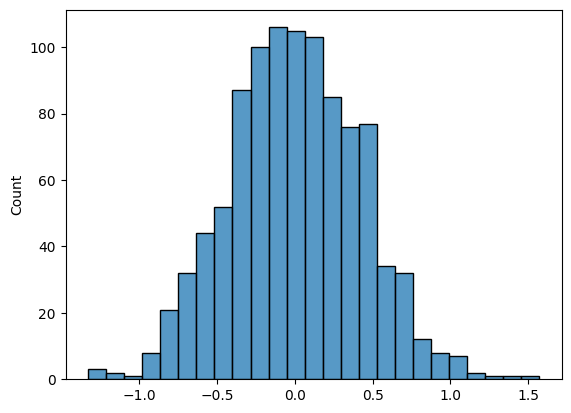

In [50]:
#Plotting the residuals in order to check the normality
s = np.random.normal(mu, sigma, 1000)
sns.histplot(s)
plt.show()

The variable **s** represents a NumPy array of 1000 random samples drawn from a normal (Gaussian) distribution where **mu** specifies the center of the distribution and **sigma** specifies measures the spread or dispersion of the distribution.

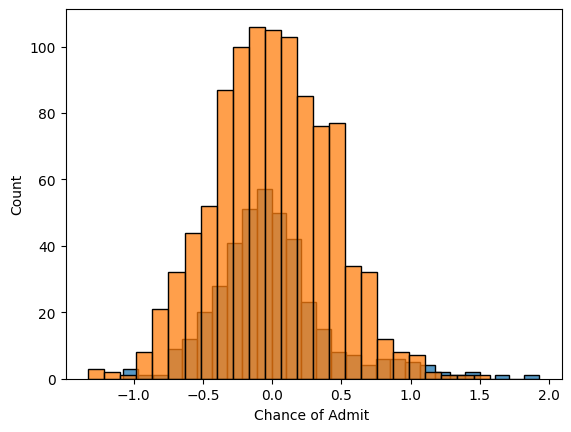

In [51]:
#plotting residual plot with respect to the theoretical plot to check the normality
sns.histplot(error)
sns.histplot(s)
plt.show()

The residual plot is superimposed with the theoretical plot which suggests that the residual data is following almost a normal curve. In conclusion, the residual curve is following a normal distribution.

#### C. Hetroskedasticity

Text(0.5, 1.0, 'Predicted values vs Residuals')

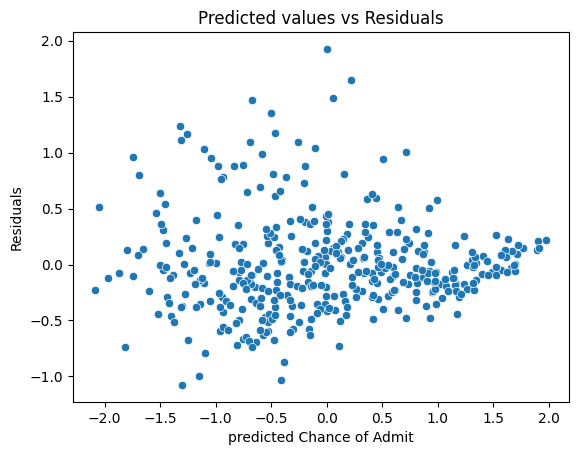

In [52]:
#to check whether the data is heteroskedastic in nature or not
sns.scatterplot(x=y_train_pred,y=error)
plt.xlabel("predicted Chance of Admit")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

The predicted chance of admit (target variable) with respect to residuals does not show a funnel shape which suggests that the data is not heteroskedastic in nature. However, we need further tests in order to crossverify the same.

In [53]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
H0 = "The is not heteroskedistic"
Ha = "The is heteroskedistic"
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', np.float64(0.9518177826782613)),
 ('p-value', np.float64(0.634033224056697))]

In [54]:
p_value = 0.634033224056697
if p_value < 0.05:
  print("Reject null hypothesis (Accept Ha) :",Ha)
else:
  print("Failed to reject null hypothesis (Accept H0) :",H0)

Failed to reject null hypothesis (Accept H0) : The is not heteroskedistic


It is concluded by applying the Goldfeld-Quandt test that the given residual plot against predicted target variable is free from heteroskedastic nature

#### D. Assumption of Linearity

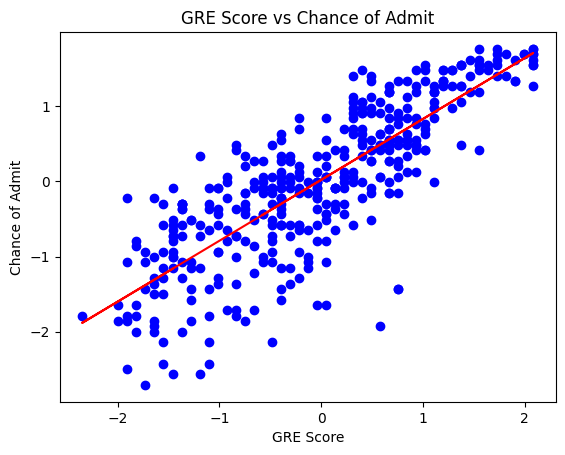

In [55]:
#Checking whether the GRE score and Chance of Admit follows a linear relationship using single variable linear regression.
plt.scatter(X_train['GRE Score'], y_train, color='blue', label='Actual Data')
XYE = LinearRegression()
axe = X_train[['GRE Score']]
XYE.fit(axe, y_train)
y_GRE_pred = XYE.predict(axe)
plt.plot(axe, y_GRE_pred, color='red', label='Prediction Line')
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.title("GRE Score vs Chance of Admit")
plt.show()

The GRE score and Chance of Admit follows a linear relationship.

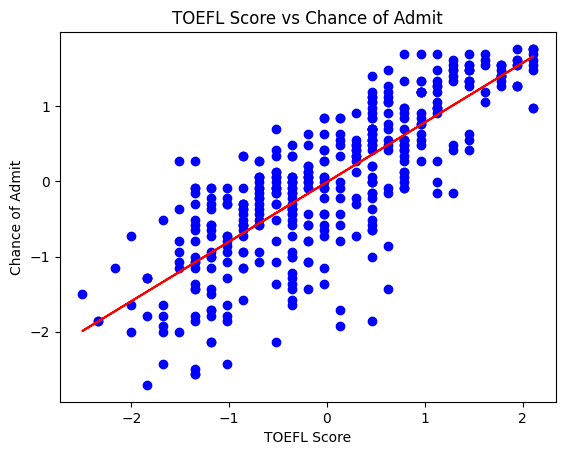

In [56]:
#Checking whether the TOEFL score and Chance of Admit follows a linear relationship using single variable linear regression.
plt.scatter(X_train['TOEFL Score'], y_train, color='blue', label='Actual Data')
XYE = LinearRegression()
axe = X_train[['TOEFL Score']]
XYE.fit(axe, y_train)
y_GRE_pred = XYE.predict(axe)
plt.plot(axe, y_GRE_pred, color='red', label='Prediction Line')
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")
plt.title("TOEFL Score vs Chance of Admit")
plt.show()

The TOEFL score and Chance of Admit follows a linear relationship.

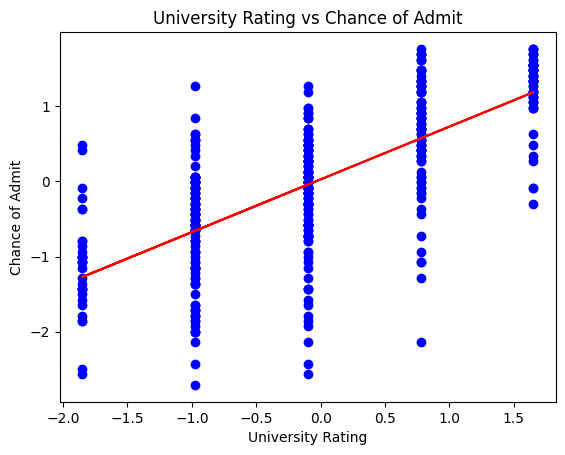

In [57]:
#Checking whether the University Rating and Chance of Admit follows a linear relationship using single variable linear regression.
plt.scatter(X_train['University Rating'], y_train, color='blue', label='Actual Data')
XYE = LinearRegression()
axe = X_train[['University Rating']]
XYE.fit(axe, y_train)
y_GRE_pred = XYE.predict(axe)
plt.plot(axe, y_GRE_pred, color='red', label='Prediction Line')
plt.xlabel("University Rating")
plt.ylabel("Chance of Admit")
plt.title("University Rating vs Chance of Admit")
plt.show()

The University Rating and Chance of Admit follows almost a linear relationship, however the university rating is a categorical variable with 5 values in it.

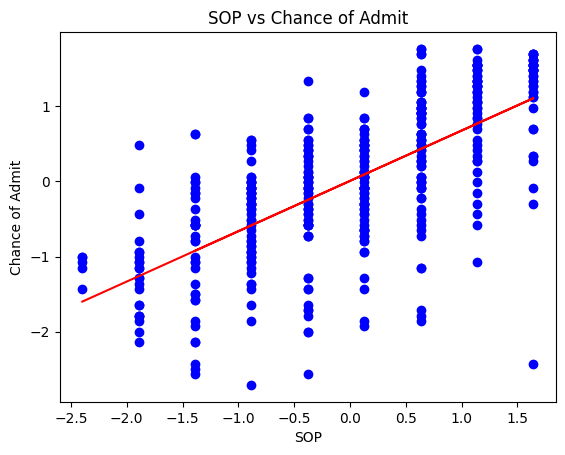

In [58]:
#Checking whether the SOP and Chance of Admit follows a linear relationship using single variable linear regression.
plt.scatter(X_train['SOP'], y_train, color='blue', label='Actual Data')
XYE = LinearRegression()
axe = X_train[['SOP']]
XYE.fit(axe, y_train)
y_GRE_pred = XYE.predict(axe)
plt.plot(axe, y_GRE_pred, color='red', label='Prediction Line')
plt.xlabel("SOP")
plt.ylabel("Chance of Admit")
plt.title("SOP vs Chance of Admit")
plt.show()

The SOP and Chance of Admit follows almost a linear relationship, however the SOP is a categorical variable with 9 values in it.

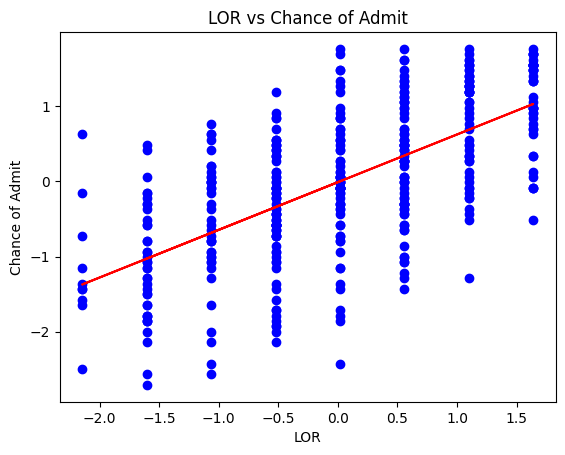

In [59]:
#Checking whether the LOR and Chance of Admit follows a linear relationship using single variable linear regression.
plt.scatter(X_train['LOR '], y_train, color='blue', label='Actual Data')
XYE = LinearRegression()
axe = X_train[['LOR ']]
XYE.fit(axe, y_train)
y_GRE_pred = XYE.predict(axe)
plt.plot(axe, y_GRE_pred, color='red', label='Prediction Line')
plt.xlabel("LOR")
plt.ylabel("Chance of Admit")
plt.title("LOR vs Chance of Admit")
plt.show()

The LOR and Chance of Admit follows almost a linear relationship, however the LOR is a categorical variable with 9 values in it.

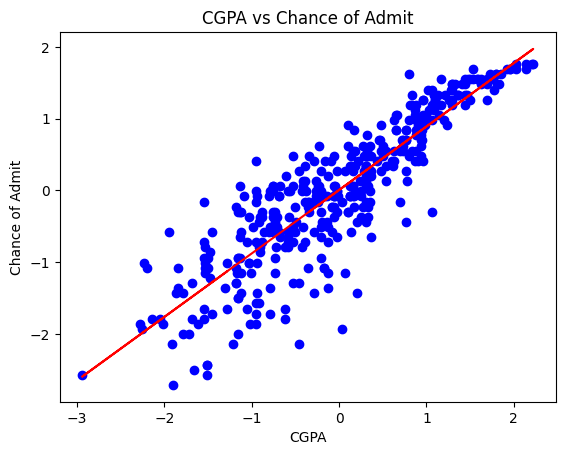

In [60]:
#Checking whether the CGPA and Chance of Admit follows a linear relationship using single variable linear regression.
plt.scatter(X_train['CGPA'], y_train, color='blue', label='Actual Data')
XYE = LinearRegression()
axe = X_train[['CGPA']]
XYE.fit(axe, y_train)
y_GRE_pred = XYE.predict(axe)
plt.plot(axe, y_GRE_pred, color='red', label='Prediction Line')
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")
plt.title("CGPA vs Chance of Admit")
plt.show()

The CGPA and Chance of Admit follows a linear relationship.

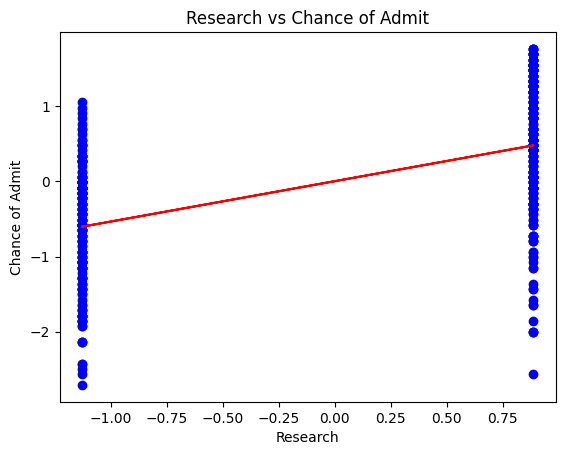

In [61]:
#Checking whether the Research and Chance of Admit follows a linear relationship using single variable linear regression.
plt.scatter(X_train['Research'], y_train, color='blue', label='Actual Data')
XYE = LinearRegression()
axe = X_train[['Research']]
XYE.fit(axe, y_train)
y_GRE_pred = XYE.predict(axe)
plt.plot(axe, y_GRE_pred, color='red', label='Prediction Line')
plt.xlabel("Research")
plt.ylabel("Chance of Admit")
plt.title("Research vs Chance of Admit")
plt.show()

The Research and Chance of Admit follows almost a linear relationship, however the Research is a categorical variable with 2 values in it.

> To conclude, Assumption of linearity is satisfied by all the features with respect to target variable.

### Lasso Regression : L1 Regularisation

In [62]:
#importing lasso linear regression model from linear_model
from sklearn.linear_model import Lasso

In [63]:
#building the lasso model with alpha = 0.001 the regularisation strength
lasso_model = Lasso(alpha=0.001)

In [64]:
#fitting the model on the training dataset
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [65]:
#Predicting the target variable.
lasso_001_train_predictions = lasso_model.predict(X_train)
lasso_001_test_predictions = lasso_model.predict(X_test)

In [66]:
#Calculation of mse
lasso_001_mse_train = mean_squared_error(y_train, lasso_001_train_predictions)
lasso_001_mse_test = mean_squared_error(y_test, lasso_001_test_predictions)
print("training mse :",lasso_001_mse_train)
print("testing mse  :",lasso_001_mse_test)

training mse : 0.17974076103380326
testing mse  : 0.17412187875254023


Interpreting the MSE Values: Training MSE: 0.1797 & Testing MSE: 0.1739

Inference:

> The similar values for training and testing MSE indicate that the model generalizes well and is not overfitting or underfitting.

> Both values being relatively low suggests the model is making accurate predictions on both datsets.


In [67]:
#Calculation of rmse
lasso_001_rmse_train = np.sqrt(lasso_001_mse_train)
lasso_001_rmse_test = np.sqrt(lasso_001_mse_test)
print("training rmse :",lasso_001_rmse_train)
print("testing rmse  :",lasso_001_rmse_test)

training rmse : 0.4239584425787547
testing rmse  : 0.4172791376914741


Interpreting the RMSE Values : Training RMSE: 0.424 & Testing RMSE: 0.417

Inference:
> The similar values for training and testing RMSE indicate the model generalizes well, showing no significant overfitting or underfitting.

> The small difference suggests the model performs consistently on unseen data, indicating reliability.

In [68]:
#Calculation of r2_score
lasso_001_r2_train = lasso_model.score(X_train,y_train)
lasso_001_r2_test = lasso_model.score(X_test,y_test)
print("training r2_score :",lasso_001_r2_train)
print("testing r2_score  :",lasso_001_r2_test)

training r2_score : 0.8215082909938763
testing r2_score  : 0.8207406430873778


Interpreting the R2 Scores : Training R2: 0.821 & Testing R2: 0.820

Inference:

> Both training and testing R2 score are high and very close, suggesting the model fits the data well and generalizes effectively to unseen data.

> The slight difference indicates minimal overfitting, which is desirable in predictive modeling.

In [69]:
#Calculation of adj. r2_score
n_train, p = X_train.shape
n_test = X_test.shape[0]

lasso_001_adj_r2_train = 1 - ((1 - lasso_001_r2_train) * (n_train - 1) / (n_train - p - 1))
lasso_001_adj_r2_test = 1 - ((1 - lasso_001_r2_test) * (n_test - 1) / (n_test - p - 1))
print("training adj. r2_score :",lasso_001_adj_r2_train)
print("testing adj. r2_score  :",lasso_001_adj_r2_test)

training adj. r2_score : 0.8183209390473385
testing adj. r2_score  : 0.8071013441918522


Interpreting the Adj. R2 Scores : Training Adj. R2: 0.8183 & Testing Adj. R2: 0.8072

Inference:

> Both values are high, suggesting a good model fit and the small gap indicates the model generalizes well to test data.

> Adjusted R2 is slightly lower than 𝑅2 , reflecting appropriate penalization for model complexity.

### Ridge Regression : L2 regularisation

In [70]:
#Importing ridge regression from linear model
from sklearn.linear_model import Ridge

In [71]:
#building the rdge regression model with alpha = 0.001 the regularization strength
ridge_model = Ridge(alpha=0.001)

In [72]:
#fitting the ridge regression model on the training set
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.001)

In [73]:
#predicting the ridge regression model
ridge_001_train_pred = model.predict(X_train)
ridge_001_test_pred = model.predict(X_test)

In [74]:
#Calculation of mse
ridge_001_mse_train = mean_squared_error(y_train, ridge_001_train_pred)
ridge_001_mse_test = mean_squared_error(y_test, ridge_001_test_pred)
print("training mse :",ridge_001_mse_train)
print("testing mse  :",ridge_001_mse_test)

training mse : 0.17973912139741452
testing mse  : 0.17399217834898525


Interpreting the MSE Values: Training MSE: 0.1797 & Testing MSE: 0.1739

Inference:

> The similar values for training and testing MSE indicate that the model generalizes well and is not overfitting or underfitting.

> Both values being relatively low suggests the model is making accurate predictions on both datasets.

In [75]:
#Calculation of rmse
ridge_001_rmse_train = np.sqrt(ridge_001_mse_train)
ridge_001_rmse_test = np.sqrt(ridge_001_mse_test)
print("training rmse :",ridge_001_rmse_train)
print("testing rmse  :",ridge_001_rmse_test)

training rmse : 0.42395650885133784
testing rmse  : 0.4171236967003736


Interpreting the RMSE Values: Training RMSE: 0.424 & Testing RMSE: 0.417

Inference:

> The similar values for training and testing RMSE indicate the model generalizes well, showing no significant overfitting or underfitting.

> The small difference suggests the model performs consistently on unseen data, indicating reliability.


In [76]:
#Calculation of r2_score
ridge_001_r2_train = ridge_model.score(X_train,y_train)
ridge_001_r2_test = ridge_model.score(X_test,y_test)
print("training r2_score :",ridge_001_r2_train)
print("testing r2_score  :",ridge_001_r2_test)

training r2_score : 0.8215099192314507
testing r2_score  : 0.8208740684919458


Interpreting the R2 Scores : Training R2: 0.82 & Testing R2: 0.82

Inference:
> Both training and testing R2 score are high and very close, suggesting the model fits the data well and generalizes effectively to unseen data.

> The slight difference indicates minimal overfitting, which is desirable in predictive modeling.

In [77]:
#Calculation of adj. r2_score
n_train, p = X_train.shape
n_test = X_test.shape[0]

ridge_001_adj_r2_train = 1 - ((1 - ridge_001_r2_train) * (n_train - 1) / (n_train - p - 1))
ridge_001_adj_r2_test = 1 - ((1 - ridge_001_r2_test) * (n_test - 1) / (n_test - p - 1))
print("training adj. r2_score :",ridge_001_adj_r2_train)
print("testing adj. r2_score  :",ridge_001_adj_r2_test)

training adj. r2_score : 0.8183225963605838
testing adj. r2_score  : 0.8072449215293764


Interpreting the Adj. R2 Scores : Training Adj. R2: 0.81 & Testing Adj. R2: 0.80.

Inference:
> Both values are high, suggesting a good model fit and the small gap indicates the model generalizes well to test data.

> Adjusted R2 is slightly lower than 𝑅2 , reflecting appropriate penalization for model complexity.


### Lasso Regression with alpha = 1e3

In [78]:
#Building lasso regression model with alpha = 1e3
lasso_model = Lasso(alpha=1e3)
lasso_model.fit(X_train, y_train)
lasso_1e3_test_predictions = lasso_model.predict(X_test)
lasso_1e3_r2_test = lasso_model.score(X_test,y_test)
print("testing r2_score  :",lasso_1e3_r2_test)

testing r2_score  : -0.000859904976438175


Increasing the alpha value has decreased the model score.

### Ridge Regression with alpha = 1e3

In [79]:
#Building ridge regression model with alpha = 1e3
ridge_model = Ridge(alpha=1e3)
ridge_model.fit(X_train, y_train)
ridge_1e3_test_pred = model.predict(X_test)
ridge_1e3_r2_test = ridge_model.score(X_test,y_test)
print("testing r2_score  :",ridge_1e3_r2_test)

testing r2_score  : 0.682110173030188


Increasing the alpha value has decreased the model score.

### Actionable Insights & Recommendations

In [80]:
df = {
    'metrics' : ['mse score','rmse score','r2_score','adj. r2_score'],
    'Linear_regression_train' : [mse_lr_train,rmse_lr_train,r2_lr_train,adj_lr_r2_train],
    'Linear_regression_test' : [mse_lr_test,rmse_lr_test,r2_lr_test,adj_lr_r2_test],
    'Lasso_regression_train' : [lasso_001_mse_train,lasso_001_rmse_train,lasso_001_r2_train,lasso_001_adj_r2_train],
    'Lasso_regression_test' : [lasso_001_mse_test,lasso_001_rmse_test,lasso_001_r2_test,lasso_001_adj_r2_test],
    'Ridge_regression_train' : [ridge_001_mse_train,ridge_001_rmse_train,ridge_001_r2_train,ridge_001_adj_r2_train],
    'Ridge_regression_test' : [ridge_001_mse_test,ridge_001_rmse_test,ridge_001_r2_test,ridge_001_adj_r2_test],
}
df = pd.DataFrame(df)
df

,metrics,Linear_regression_train,Linear_regression_test,Lasso_regression_train,Lasso_regression_test,Ridge_regression_train,Ridge_regression_test
0,mse score,0.179739,0.173992,0.179741,0.174122,0.179739,0.173992
1,rmse score,0.423957,0.417124,0.423958,0.417279,0.423957,0.417124
2,r2_score,0.821510,0.820874,0.821508,0.820741,0.821510,0.820874
3,adj. r2_score,0.818323,0.807245,0.818321,0.807101,0.818323,0.807245


Based on the above metrics we can conclude the following :

> Almost all 3 models linear regression, lasso regression with alpha = 0.001 and ridge regression with alpha = 0.001 has shown similar output.
>
> Increasing the alpha strength in lasso and ridge has shown a significant decrease in the r2_score and adj. r2_score.
>
> After comparing all three models, we conclude that **linear regression** is the most suitable machine learning model for the Jamboree dataset.
>
> **Model interpretability** is a critical factor in selecting an ML model, and linear regression provides this advantage.
>
> In contrast, lasso and ridge regression increase model complexity, making them less ideal for this dataset.
>
> Furthermore, our linear regression model does not exhibit signs of overfitting or underfitting, providing another reason to eliminate lasso and ridge regression as viable options.
>
> To enhance the accuracy of our linear regression model, we need a larger dataset for training, as the current one contains only 500 unique records.
>
>  Additionally, incorporating more relevant features could improve the model's performance, as the existing features include a significant number of categorical variables.